In [1]:
import pandas as pd

In [2]:
training_data = pd.read_parquet("../Databases/cf_train.parquet/part-00003-f5f99d61-97a3-408a-9dcd-5d6fc378fff2-c000.snappy.parquet")

In [3]:
training_data.head()

,user_id,count,track_id,__index_level_0__,user_id_index,track_id_index
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,TRIQAUQ128F42435AD,0,103159,2994
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,TRIRLYL128F42539D1,1,103159,12575
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,2,TRMHBXZ128F4238406,2,103159,3524
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,TRYQMNI128F147C1C7,3,103159,32121
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,TRAHZNE128F9341B86,4,103159,20989


In [4]:
map_track_index_id = {}
for track_id_index,track_id in zip(training_data['track_id_index'],training_data['track_id']):
    map_track_index_id[track_id_index] = track_id

In [5]:
from pathlib import Path
import pandas as pd

data_dir = Path('../Databases/itemFactors_5_12_130am.parquet-20210512T212320Z-001/itemFactors_5_12_130am.parquet')
item_factors_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet')
)

In [6]:
item_factors_df.head()

,id,features
0,0,"[-0.069474705, 0.4626529, -0.11687545, -0.7458..."
1,10,"[-0.19217631, 0.33361778, -0.6735579, -0.31199..."
2,20,"[-0.05328676, 0.44249037, -0.18045868, -0.1672..."
3,30,"[-0.15235876, 0.35179976, 0.64976025, -0.63035..."
4,40,"[-0.15211484, 0.38842732, -0.17080618, -0.2903..."


In [7]:
import sqlite3

# Create a SQL connection to our SQLite database
con = sqlite3.connect("../Databases/track_metadata.db")

metadata_df = pd.read_sql_query("SELECT * FROM songs", con)

In [8]:
metadata_df.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,,Der Mystic,514.29832,0.000000,0.000000,0


In [9]:
item_factors_df['id'] = item_factors_df['id'].apply(lambda x: map_track_index_id[x])

In [10]:
item_factors_df.head()

,id,features
0,TRDMBIJ128F4290431,"[-0.069474705, 0.4626529, -0.11687545, -0.7458..."
1,TRSLDDC12903CC36E7,"[-0.19217631, 0.33361778, -0.6735579, -0.31199..."
2,TRRGQKP128F1469E20,"[-0.05328676, 0.44249037, -0.18045868, -0.1672..."
3,TROTIUH128E0782538,"[-0.15235876, 0.35179976, 0.64976025, -0.63035..."
4,TRYVBMA128E0789D39,"[-0.15211484, 0.38842732, -0.17080618, -0.2903..."


In [11]:
item_factors_df.merge(metadata_df,how='left',left_on=['id'],right_on=['track_id'])

,id,features,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRDMBIJ128F4290431,"[-0.069474705, 0.4626529, -0.11687545, -0.7458...",TRDMBIJ128F4290431,Sehr kosmisch,SOFRQTD12A81C233C0,Musik von Harmonia,AR0IVTL1187B9AD520,122d63fc-8671-43e4-9752-34e846d62a9c,Harmonia,655.77751,0.505949,0.848826,0
1,TRSLDDC12903CC36E7,"[-0.19217631, 0.33361778, -0.6735579, -0.31199...",TRSLDDC12903CC36E7,OMG,SOUSMXX12AB0185C24,OMG - The Remixes,ARPDVPJ1187B9ADBE9,3414d446-735a-443c-931f-10634f57e5b9,Usher featuring will.i.am,395.72853,0.856449,0.854638,2010
2,TRRGQKP128F1469E20,"[-0.05328676, 0.44249037, -0.18045868, -0.1672...",TRRGQKP128F1469E20,Représente,SOOFYTN12A6D4F9B35,Fat Come Back,ARZO9UQ1187FB4D261,8bc9464e-5967-477e-a9c3-ad5639d24517,Alliance Ethnik,252.21179,0.509271,0.437972,1999
3,TROTIUH128E0782538,"[-0.15235876, 0.35179976, 0.64976025, -0.63035...",TROTIUH128E0782538,Creep (Explicit),SOPQLBY12A6310E992,Pablo Honey,ARH6W4X1187B99274F,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,235.70240,0.899935,0.683658,1993
4,TRYVBMA128E0789D39,"[-0.15211484, 0.38842732, -0.17080618, -0.2903...",TRYVBMA128E0789D39,Fix You,SOWEJXA12A6701C574,X & Y,ARJ7KF01187B98D717,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,294.11220,0.865022,0.916053,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385366,TRHQZJQ12903CF2BDD,"[0.0051599503, 0.0043735197, -0.0139320055, 0....",TRHQZJQ12903CF2BDD,Programmer,SOTBELW12AC468DC79,futureaudio presents Minimal Techno Vol. 7,AR548LF1187FB4ADDF,df24ea02-3a98-4e23-bcb3-8157d6ea9b89,Italoboyz & James What,430.44526,0.633616,0.431798,2006
385367,TRLQSWK128F4217DA6,"[0.008389606, 0.009367179, 0.00044970328, -0.0...",TRLQSWK128F4217DA6,Serenade No. 13 in G 'Eine kleine Nachtmusik' ...,SOJZCMG12A6D4FAC55,Mozart - Eine kleine Nachtmusik,ARBH0MS1187FB36311,afb8d624-52d7-4a72-8d0b-62fff3e29f79,Academy of St Martin-in-the-Fields/Sir Neville...,118.56934,0.430025,0.353034,0
385368,TRLPCNF128F932982F,"[0.004459128, -0.014391842, 0.0026645928, -0.0...",TRLPCNF128F932982F,Corruption,SOMIRPJ12AB0184E06,Revenge,ARAFI9R1187B9AC5B5,1a2983b8-1d9a-42ea-b701-15792ca56edd,Culture Kultür,262.32118,0.544723,0.409274,2001
385369,TRYABEV128F425CE78,"[0.06268522, 0.010092053, 0.009654149, 0.03299...",TRYABEV128F425CE78,Jerome,SOCLZFU12A58A76366,The Little Death,ARHMWWJ1187B9902E0,1eb81458-10d5-4083-8722-0a26d57adaf9,Ruth Ruth,200.93342,0.471978,0.358941,0


In [34]:
from sklearn.manifold import TSNE
import numpy as np

# X = np.array(item_factors_df['features'])
X = np.matrix(item_factors_df['features'].tolist())

In [35]:
X.shape

(385371, 200)

In [32]:
np.array(item_factors_df['features'])

array([array([-6.94747046e-02,  4.62652892e-01, -1.16875447e-01, -7.45854914e-01,
        7.36263692e-02, -2.30880722e-01, -5.58529258e-01,  5.09921014e-01,
        3.18228483e-01,  1.99786127e-01,  5.34231484e-01,  7.18131661e-01,
        3.30222324e-02, -7.34424293e-02, -1.16335034e-01,  7.54519701e-01,
        2.97470659e-01,  2.92450581e-02, -8.58272309e-04,  7.26740509e-02,
        2.88677007e-01, -3.85236889e-01,  5.15419066e-01,  5.33267204e-03,
       -1.28632411e-01, -6.94034845e-02,  4.45928663e-01, -5.77061057e-01,
        1.72358245e-01, -3.32147032e-01, -2.76429802e-01,  7.53741413e-02,
       -1.64543167e-01,  4.66681629e-01, -1.34255558e-01,  5.96634269e-01,
        1.95986167e-01,  1.23241916e-01, -6.79407299e-01,  1.66238233e-01,
       -1.62234560e-01,  1.29068518e+00,  6.68992460e-01,  3.92091781e-01,
        1.96400341e-02, -4.29917425e-02, -6.76838994e-01, -8.10869694e-01,
       -7.39638567e-01,  3.82318944e-01,  6.88921213e-01,  7.55197555e-02,
        4.50027347

In [33]:
X.shape

(385371,)

In [37]:
X_embedded = TSNE(n_components=2, n_jobs= - 1).fit_transform(X)
# X_embedded[:,0]
# X_embedded[:,1]

<AxesSubplot:xlabel='X', ylabel='Y'>

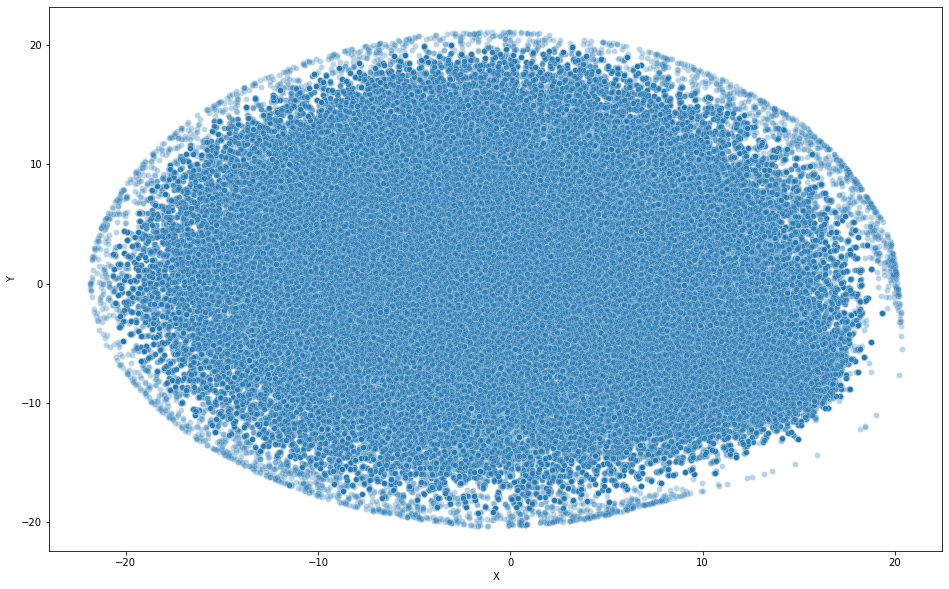

In [42]:
# df_subset['tsne-2d-one'] = tsne_results[:,0]
# df_subset['tsne-2d-two'] = tsne_results[:,1]
import matplotlib.pyplot as plt
import seaborn as sns

df_embedded = pd.DataFrame({'X':X_embedded[:,0], 'Y':X_embedded[:,1]})
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
#     hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_embedded,
    legend="full",
    alpha=0.3
)

# Top 10 Most Occuring Tags

In [43]:
import sqlite3

# Create a SQL connection to our SQLite database
con_lastfm = sqlite3.connect("../Databases/lastfm_tags.db")

cur = con_lastfm.cursor()

# The result of a "cursor.execute" can be iterated over by row
for row in cur.execute('SELECT * FROM sqlite_master WHERE type="table";'):
    print(row)

cur.execute('SELECT * FROM sqlite_master WHERE type="table";').fetchall()

('table', 'tags', 'tags', 2, 'CREATE TABLE tags (tag TEXT)')
('table', 'tids', 'tids', 3, 'CREATE TABLE tids (tid TEXT)')
('table', 'tid_tag', 'tid_tag', 4, 'CREATE TABLE tid_tag (tid INT, tag INT, val FLOAT)')


[('table', 'tags', 'tags', 2, 'CREATE TABLE tags (tag TEXT)'),
 ('table', 'tids', 'tids', 3, 'CREATE TABLE tids (tid TEXT)'),
 ('table',
  'tid_tag',
  'tid_tag',
  4,
  'CREATE TABLE tid_tag (tid INT, tag INT, val FLOAT)')]

In [46]:
tid_df = pd.read_sql_query("SELECT * FROM tids;", con_lastfm)

In [47]:
tag_df = pd.read_sql_query("SELECT * FROM tags;", con_lastfm)

In [48]:
tid_tag_df = pd.read_sql_query("SELECT * FROM tid_tag;", con_lastfm)

In [49]:
map_idx_tid = {}
for i in range(len(tid_df)):
    map_idx_tid[i + 1] = tid_df['tid'][i]

In [50]:
map_idx_tag = {}
for i in range(len(tag_df)):
    map_idx_tag[i + 1] = tag_df['tag'][i]

In [51]:
tid_tag_df['tid'] = tid_tag_df['tid'].apply(lambda x: map_idx_tid[x])

In [52]:
tid_tag_df['tag'] = tid_tag_df['tag'].apply(lambda x: map_idx_tag[x])

In [53]:
tid_tag_count_df = pd.DataFrame(tid_tag_df['tag'].value_counts())
tid_tag_count_df.head()

,tag
rock,101071
pop,69159
alternative,55777
indie,48175
electronic,46270


In [56]:
top_20_genres = list(tid_tag_count_df.index[:20])

In [57]:
tid_tag_df.head(2)

,tid,tag,val
0,TRCCCYE12903CFF0E9,classic rock,100.0
1,TRCCCYE12903CFF0E9,Progressive rock,100.0


In [58]:
len(tid_tag_df)

8598630

In [64]:
top_20_genres

['rock',
 'pop',
 'alternative',
 'indie',
 'electronic',
 'female vocalists',
 'favorites',
 'Love',
 'dance',
 '00s',
 'alternative rock',
 'jazz',
 'beautiful',
 'singer-songwriter',
 'metal',
 'chillout',
 'male vocalists',
 'Awesome',
 'classic rock',
 'soul']

In [65]:
tid_tag_df.loc[~tid_tag_df['tag'].isin(top_20_genres)]

,tid,tag,val
1,TRCCCYE12903CFF0E9,Progressive rock,100.0
2,TRCCCFH12903CEBC70,blues,100.0
3,TRCCCFH12903CEBC70,memphis slim,100.0
5,TRCCCJT128F429FFF6,70s,33.0
6,TRCCCJT128F429FFF6,Middle of the road,33.0
...,...,...,...
8598625,TRVVVTG128F9305E3C,Mozambique,50.0
8598626,TRVVVTG128F9305E3C,BO,50.0
8598627,TRVVVTG128F9305E3C,3 stars,50.0
8598628,TRVVVTG128F9305E3C,zart,50.0


In [68]:
tid_tag_top_20_df = tid_tag_df.loc[tid_tag_df['tag'].isin(top_20_genres)]

In [67]:
len(tid_tag_df)

8598630

In [69]:
tid_tag_top_20_df.head(5)

,tid,tag,val
0,TRCCCYE12903CFF0E9,classic rock,100.0
4,TRCCCJT128F429FFF6,pop,100.0
33,TRCCJTD12903CB62E6,beautiful,20.0
37,TRCCJTD12903CB62E6,indie,20.0
39,TRCCJTD12903CB62E6,chillout,20.0


In [74]:
tid_tag_top_20_group_tid_df = tid_tag_top_20_df.groupby(['tid'])['tag'].apply(','.join).reset_index()

In [75]:
tid_tag_top_20_group_tid_df.head()

,tid,tag
0,TRAAAAK128F9318786,"alternative rock,rock,00s"
1,TRAAABD128F429CF47,"soul,pop,rock,male vocalists,beautiful,Love,cl..."
2,TRAAADJ128F4287B47,"rock,classic rock"
3,TRAAAED128E0783FAB,"jazz,singer-songwriter,pop,chillout,favorites,..."
4,TRAAAEM128F93347B9,Awesome


In [76]:
len(set(tid_tag_top_20_group_tid_df['tag']))

49345

In [77]:
tid_tag_top_20_group_FIRST_tid_df = tid_tag_top_20_df.groupby(['tid'])['tag'].first().reset_index()

In [78]:
tid_tag_top_20_group_FIRST_tid_df.head()

,tid,tag
0,TRAAAAK128F9318786,alternative rock
1,TRAAABD128F429CF47,soul
2,TRAAADJ128F4287B47,rock
3,TRAAAED128E0783FAB,jazz
4,TRAAAEM128F93347B9,Awesome


In [ ]:
pd.merge(tid_tag_df, tid_tag_top_20_df, on='tid', how = 'inner')

In [80]:
item_factors_df.merge(tid_tag_top_20_group_FIRST_tid_df,how='inner',left_on=['id'],right_on=['tid'])

,id,features,tid,tag
0,TRDMBIJ128F4290431,"[-0.069474705, 0.4626529, -0.11687545, -0.7458...",TRDMBIJ128F4290431,electronic
1,TRSLDDC12903CC36E7,"[-0.19217631, 0.33361778, -0.6735579, -0.31199...",TRSLDDC12903CC36E7,pop
2,TROTIUH128E0782538,"[-0.15235876, 0.35179976, 0.64976025, -0.63035...",TROTIUH128E0782538,alternative rock
3,TRYVBMA128E0789D39,"[-0.15211484, 0.38842732, -0.17080618, -0.2903...",TRYVBMA128E0789D39,rock
4,TREBDEB12903CC0C56,"[-0.111190684, 0.01336179, -0.5532145, 0.05012...",TREBDEB12903CC0C56,dance
...,...,...,...,...
155849,TRCPNFM128F4255F4B,"[0.025098754, 0.032094285, 0.03068078, -0.0403...",TRCPNFM128F4255F4B,pop
155850,TRVTAZP128F42436D1,"[-0.026577989, 0.031688616, 0.0031696423, -0.0...",TRVTAZP128F42436D1,pop
155851,TRMBHZX128E0794E94,"[0.012983622, -0.0015417403, -0.0038825353, -0...",TRMBHZX128E0794E94,alternative
155852,TRLCUMV128F4278CF1,"[-0.008923975, 0.020496793, -0.011952507, -0.0...",TRLCUMV128F4278CF1,singer-songwriter


In [82]:
tags_FIRST_20_item_factors_df = item_factors_df.merge(tid_tag_top_20_group_FIRST_tid_df,how='inner',left_on=['id'],right_on=['tid'])

In [83]:
from sklearn.manifold import TSNE
import numpy as np

# X = np.array(item_factors_df['features'])
X_FIRST_20 = np.matrix(tags_FIRST_20_item_factors_df['features'].tolist())

In [ ]:
X_embedded = TSNE(n_components=2, n_jobs= - 1).fit_transform(X_FIRST_20)

In [ ]:
# df_subset['tsne-2d-one'] = tsne_results[:,0]
# df_subset['tsne-2d-two'] = tsne_results[:,1]
import matplotlib.pyplot as plt
import seaborn as sns

df_embedded = pd.DataFrame({'X':X_embedded[:,0], 'Y':X_embedded[:,1],'tag':tags_FIRST_20_item_factors_df['tag']})
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="X", y="Y",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_embedded,
    legend="full",
    alpha=0.3
)

In [71]:
len(tid_tag_top_20_df), len(tid_tag_df)

(779402, 8598630)

In [72]:
pd.merge(tid_tag_df, tid_tag_top_20_df, on='tid', how = 'inner')

,tid,tag_x,val_x,tag_y,val_y
0,TRCCCYE12903CFF0E9,classic rock,100.0,classic rock,100.0
1,TRCCCYE12903CFF0E9,Progressive rock,100.0,classic rock,100.0
2,TRCCCJT128F429FFF6,pop,100.0,pop,100.0
3,TRCCCJT128F429FFF6,70s,33.0,pop,100.0
4,TRCCCJT128F429FFF6,Middle of the road,33.0,pop,100.0
...,...,...,...,...,...
38009717,TRVVVTG128F9305E3C,Mozambique,50.0,jazz,100.0
38009718,TRVVVTG128F9305E3C,BO,50.0,jazz,100.0
38009719,TRVVVTG128F9305E3C,3 stars,50.0,jazz,100.0
38009720,TRVVVTG128F9305E3C,zart,50.0,jazz,100.0
